In [40]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [19]:
TX = 1
RX = 3
# test folder
#filename = "test/csv" + str(TX) + "x" + str(RX) + ".csv"
# data folder
date = "0708"
action = "sit"
test_id = 2
filename = "data/" + date + "/" + action + "-" + str(test_id) + "/csv" + str(TX) + "x" +str (RX) + ".csv"

raw = np.genfromtxt(filename, delimiter=',')
raw = raw[:, :-1]
print(raw)
print(raw.shape)

[[ 98.9545 133.933  157.544  ... 149.037  167.108  164.177 ]
 [ 93.6056 125.32   142.271  ... 143.534  163.371  162.348 ]
 [102.616  126.151  154.932  ... 142.678  145.661  155.438 ]
 ...
 [120.108  150.881  190.066  ... 176.173  179.869  198.063 ]
 [115.966  147.567  177.992  ... 171.073  190.16   190.924 ]
 [106.888  136.825  162.308  ... 153.951  168.885  174.917 ]]
(9690, 56)


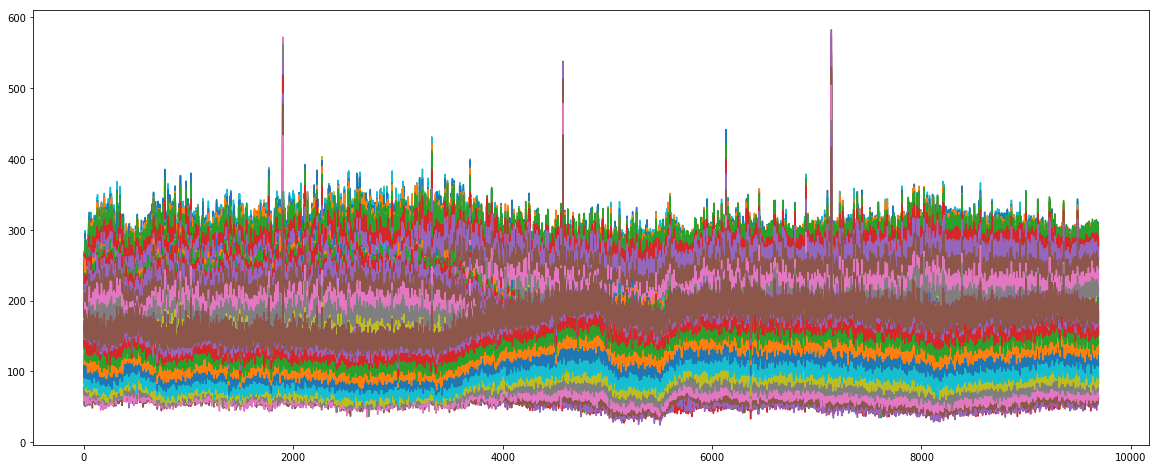

In [20]:
plt.figure(1, figsize=(20,8))
f1 = plt.plot(raw)

In [21]:
ave = np.mean(raw, axis=0)
std = np.std(raw, axis=0)
print("平均值：", ave)
print("標準差：", std)

平均值： [125.62531077 155.09358576 180.16807472 204.35626275 220.47828596
 241.65027482 256.51253199 275.14852157 280.91906295 288.90721909
 287.91195769 284.97946264 284.23740691 267.37853137 253.36439876
 232.05067812 208.40340382 189.53885913 164.19979732 139.86273282
 109.84147814  92.13478715  78.73687486  78.3570042   88.04025261
 105.65539794 119.9473852  143.5665043  174.01036904 186.20960526
 192.05037286 193.64946068 192.32356667 187.24679195 178.9386769
 167.07712487 150.7059463  136.29395564 117.07530505 102.89970415
  87.24184698  75.27226497  67.79677036  60.95689033  58.12965779
  59.77767251  63.72773462  73.60167669  82.92731905  92.23180047
 109.19094637 123.58828469 138.29177219 153.18860402 168.88668514
 172.56389061]
標準差： [19.87715749 21.38872433 22.60971363 23.47459661 24.38262029 24.84073652
 25.47442773 25.17572176 25.04940905 24.76957125 23.8363105  22.77176479
 21.79832463 20.4080146  19.35406994 17.96288022 16.7183871  16.03704933
 14.88940766 14.12101991 12.870

In [35]:
# 濾波-平均與標準差
de = []
for i in range(raw.shape[0]):
    for j in range(raw.shape[1]):
        if (raw[i][j] > (ave[j] + 3 * std[j])) | (raw[i][j] < (ave[j] - 3 * std[j])):
            de.append(i)
            break
preprocess = np.delete(raw, de, 0)
print(preprocess.shape)

(9481, 56)


In [38]:
# 濾波-斜率與標準差
de = []
for i in range(raw.shape[0] - 1):
    for j in range(raw.shape[1]):
        if abs(raw[i + 1][j] - raw[i][j]) > 3.5 * std[j] :
            de.append(i + 1)
            break
preprocess = np.delete(raw, de, 0)
print(preprocess.shape)

(9524, 56)


(9690, 56) (9524, 56)


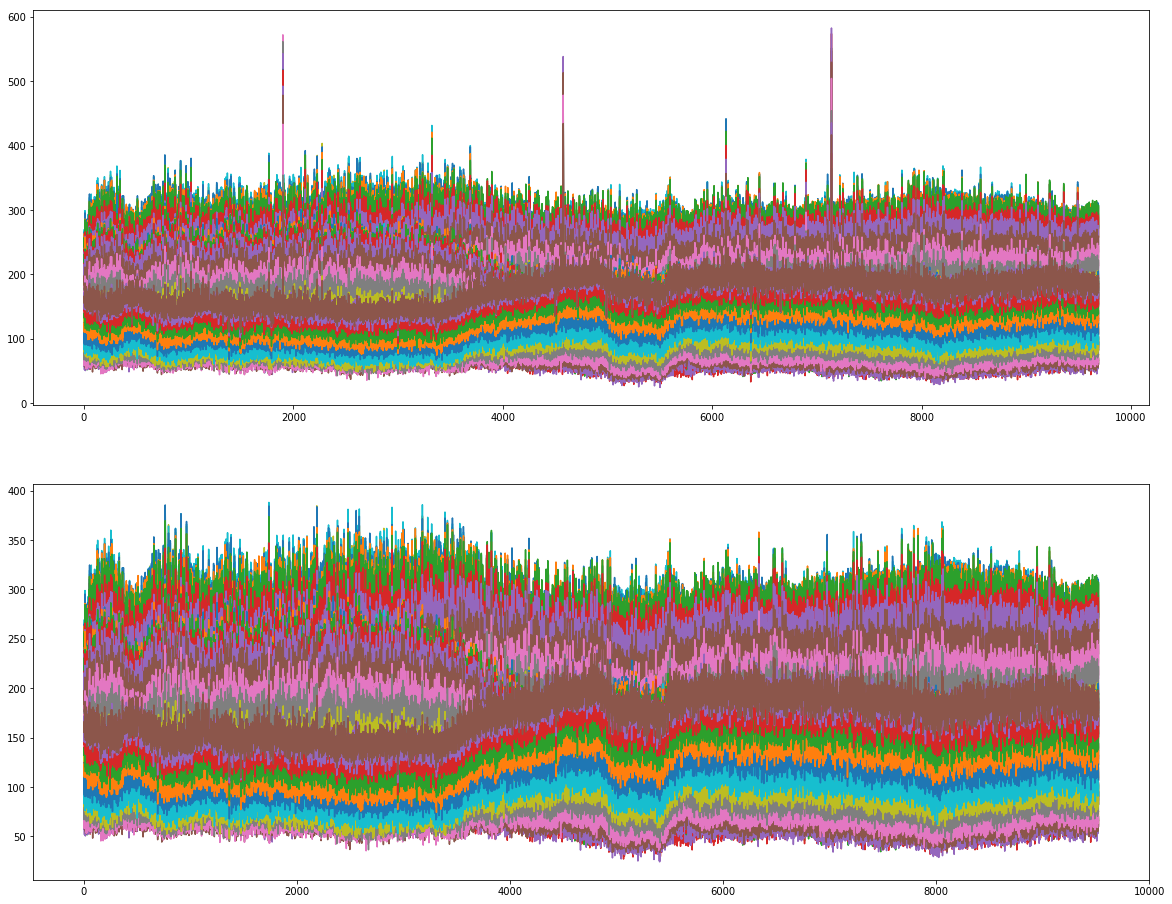

In [39]:
print(raw.shape, preprocess.shape)
plt.figure(2, figsize=(20,16))
plt.subplot(211)
f1 = plt.plot(raw)
plt.subplot(212)
f2 = plt.plot(preprocess)

In [47]:
# save preprocess data
dest = "preprocess/" + date + "/" + action + "-" + str(test_id)
os.mkdir(dest, mode=0o775)

In [52]:
dest = "preprocess/" + date + "/" + action + "-" + str(test_id) + "/csv" + str(TX) + "x" +str (RX) + ".csv"
np.savetxt(dest, preprocess, delimiter=",", fmt='%.4f')